In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
from sklearn import linear_model
import matplotlib.pyplot as plt

/Users/viktorp/anaconda/lib/python3.5/site-packages/sklearn/utils/fixes.py:64: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if 'order' in inspect.getargspec(np.copy)[0]:


In [2]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

In [3]:
def polynomial_dataframe(feature, degree): # feature is pandas.Series type
    # assume that degree >= 1
    # initialize the dataframe:
    poly_dataframe = pd.DataFrame()
    # and set poly_dataframe['power_1'] equal to the passed feature
    poly_dataframe['power_1'] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # assign poly_dataframe[name] to be feature^power; use apply(*)
            poly_dataframe[name] = feature**power
    poly_dataframe['constant'] = 1

    return poly_dataframe

In [4]:
tmp = pd.Series([1., 2., 3.])
print(polynomial_dataframe(tmp, 3))

   power_1  power_2  power_3  constant
0        1        1        1         1
1        2        4        8         1
2        3        9       27         1


# Prediction with 1 degree polynomial

In [5]:
sales = pd.read_csv('kc_house_data.csv', dtype = dtype_dict)
sales = sales.sort_values(by=['sqft_living', 'price'])

In [6]:
poly1_data = polynomial_dataframe(sales['sqft_living'], 1)
poly1_data['price'] = sales['price']

In [7]:
model1 = linear_model.LinearRegression(fit_intercept=False)
model1.fit(poly1_data[['constant','power_1']], poly1_data['price'])

/Users/viktorp/anaconda/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)


LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [8]:
model1.coef_

array([-43580.74309449,    280.6235679 ])

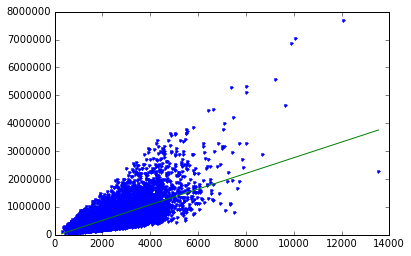

In [9]:
plt.plot(poly1_data['power_1'], poly1_data['price'], '.', 
        poly1_data['power_1'], model1.predict(poly1_data[['constant','power_1']]), '-')

# Prediction with 2-nd and 3-rd degree polynomial

In [10]:
poly3_data = polynomial_dataframe(sales['sqft_living'], 3)
features = ['constant'] + poly3_data.columns.values.tolist()
features_2 = features[:3]
print(features_2)
features_3 = features[:4]
print(features_3)

['constant', 'power_1', 'power_2']
['constant', 'power_1', 'power_2', 'power_3']


In [11]:
poly3_data['price'] = sales['price']
model2 = linear_model.LinearRegression(fit_intercept=False)
model2.fit(poly3_data[features_2], poly3_data['price'])
model3 = linear_model.LinearRegression(fit_intercept=False)
model3.fit(poly3_data[features_3], poly3_data['price'])

/Users/viktorp/anaconda/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)


LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

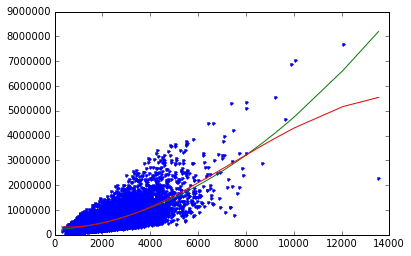

In [12]:
plt.plot(poly3_data['power_1'], poly3_data['price'], '.', 
        poly3_data['power_1'], model2.predict(poly3_data[features_2]), '-',
        poly3_data['power_1'], model3.predict(poly3_data[features_3]), '-'
        )

# Predictiction with polinom of 15 degree

In [13]:
poly15_data = polynomial_dataframe(sales['sqft_living'], 15)
features_15 = ['constant'] + poly15_data.columns.values[:15].tolist()
print(features_15)
poly15_data['price'] = sales['price']
model15 = linear_model.LinearRegression(fit_intercept=False)
model15.fit(poly15_data[features_15], poly15_data['price'])

['constant', 'power_1', 'power_2', 'power_3', 'power_4', 'power_5', 'power_6', 'power_7', 'power_8', 'power_9', 'power_10', 'power_11', 'power_12', 'power_13', 'power_14', 'power_15']


/Users/viktorp/anaconda/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)


LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

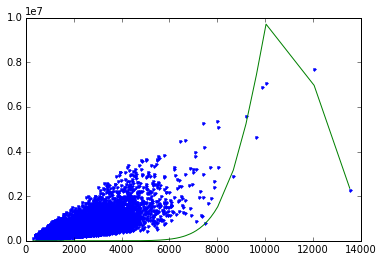

In [14]:
plt.plot(poly15_data['power_1'], poly15_data['price'], '.',
        poly15_data['power_1'], model15.predict(poly15_data[features_15]), '-')

# Estimating 15th degree polynomial for sales subsets

In [15]:
set_1 = pd.read_csv('wk3_kc_house_set_1_data.csv', dtype=dtype_dict)
set_2 = pd.read_csv('wk3_kc_house_set_2_data.csv', dtype=dtype_dict)
set_3 = pd.read_csv('wk3_kc_house_set_3_data.csv', dtype=dtype_dict)
set_4 = pd.read_csv('wk3_kc_house_set_4_data.csv', dtype=dtype_dict)
subsets = [set_1, set_2, set_3, set_4]

In [16]:
subset_models = []
for (i, subset) in enumerate(subsets):
    subset_poly15 = polynomial_dataframe(subset['sqft_living'], 15)
    features_15 = ['constant'] + subset_poly15.columns.values[:15].tolist()
    subset_poly15['price'] = subset['price']
    subset_model = linear_model.LinearRegression(fit_intercept=False)
    subset_model.fit(subset_poly15[features_15], subset_poly15['price'])
    subset_models.append(subset_model)

# Is the sign (positive or negative) for power_15 the same in all four models?

In [17]:
for (i, model) in enumerate(subset_models):
    print(model.coef_[15])

2.70204342076e-52
-3.31987748947e-49
4.56200509375e-51
-1.00221075723e-48


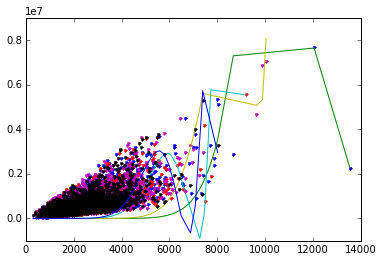

In [18]:
for (model, subset) in zip(subset_models, subsets):
    poly_set = polynomial_dataframe(subset['sqft_living'], 15)
    features_15 = ['constant'] + poly_set.columns.values[:15].tolist()
    plt.plot(poly_set['power_1'], subset['price'], '.',
            poly_set['power_1'], model.predict(poly_set[features_15]), '-')

# Select best polynomial feature

In [22]:
training_data = pd.read_csv('wk3_kc_house_train_data.csv', dtype=dtype_dict)
validation_data = pd.read_csv('wk3_kc_house_valid_data.csv', dtype=dtype_dict)
test_data = pd.read_csv('wk3_kc_house_test_data.csv', dtype=dtype_dict)

In [30]:
validation_poly_RSS = []
poly_models = []
for degree in range(1, 16):
    training_poly = polynomial_dataframe(training_data['sqft_living'], degree)
    degree_features = ['constant'] + training_poly.columns.values[:degree].tolist()
    training_poly['price'] = training_data['price']
    regr = linear_model.LinearRegression(fit_intercept=False)
    regr.fit(training_poly[degree_features], training_poly['price'])
    poly_models.append(regr)
    validation_data_poly = polynomial_dataframe(validation_data['sqft_living'], degree)
    error = validation_data['price'] - regr.predict(validation_data_poly[degree_features])
    RSS = error.T.dot(error)
    validation_poly_RSS.append(RSS)

In [31]:
validation_poly_RSS

[629097886299586.0,
 623955062706519.5,
 625820280268345.88,
 629987726205413.88,
 635093812629578.0,
 1777694369209873.5,
 10074410325410116.0,
 48507681731651368.0,
 2.1836761447419587e+17,
 9.4610553671480205e+17,
 3.8638461185265987e+18,
 1.4769334120626762e+19,
 1.4203156003611302e+18,
 4.0264955123220577e+18,
 1.165299858107777e+19]

In [32]:
best_polynom_index = validation_poly_RSS.index(min(validation_poly_RSS))
best_polynom_index

1

In [33]:
min(validation_poly_RSS)

623955062706519.5

In [38]:
test_poly = polynomial_dataframe(test_data['sqft_living'], best_polynom_index + 1)
test_features = ['constant'] + test_poly.columns.values[:best_polynom_index + 1].tolist()
print(test_features)

['constant', 'power_1', 'power_2']


In [39]:
test_error = test_data['price'] - poly_models[best_polynom_index].predict(test_poly[test_features])

In [40]:
test_RSS = error.T.dot(error)

In [41]:
test_RSS

1.165299858107777e+19